<img src="logo.png" alt="La poule qui chante" style="width: 400px;" align="left"/>


# Contexte
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.<br>
L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

# Initialisation du projet

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import matplotlib.dates as mdates # pour gérer l'affichage date dans les axes graphiques
import seaborn as sns

from scipy import stats as st

#Librairies utiliséees pour l'analyse
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


#from functions import plot_dendrogram
#from sklearn import preprocessing

from termcolor import colored # to format text


## Paramètres

In [2]:
%matplotlib inline 
# On indique que l'on veut voir apparaître les graphiques dans le notebook, sinon on ne verrait rien

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 20)

## Import des fichiers

In [3]:
path='./Fichiers/'
food_avail=pd.read_csv(path+"DisponibiliteAlimentaire_2017.csv")
population=pd.read_csv(path+"Population_2000_2018.csv")
region=pd.read_excel(path+"List_of_countries.xlsx")

## Fonctions

In [4]:
def mean_and_standard_deviation(X) :

    ''' 
    Displays the mean and std of a datadrame
    Parameters : dataframe
    '''

# Observation des moyennes et écart-types du tableau
    return print (
f'''Moyennes:
{X.mean()}

Ecart-type :
{X.std()}
''')


In [5]:
def build_plot(data_frame,var, cah):
    """
    Fonction pour croiser des variables qualitatives 
    et quantitatives en fonction d'une variable qualitative.
    """
    
    #if (np.issubdtype(dfdata[explicative].dtype, np.number)) :
    plt.figure(figsize=(6,3))
    sns.boxplot(data=data_frame,x=var,y=cah,orient="h")

    plt.xlabel(var,fontsize=10)
    plt.ylabel(cah,fontsize=10)
    plt.title(var + " selon " + cah ,fontsize=15, pad=20)
    '''else :
        pd.crosstab(dfdata[a_expliquer], dfdata[explicative])\
        .apply(lambda r: r/r.sum(), axis=1).plot(kind='barh',stacked=True,legend=False, color=colorsmod,  figsize=(12,4))
        plt.figure(figsize=(6,3))
        plt.xlabel(explicative,fontsize=10)
        plt.ylabel(a_expliquer,fontsize=10)
        plt.title(explicative + " selon " + a_expliquer,fontsize=15)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))'''

# Les données

## Analyse de la qualité des données

### Type des données

In [6]:
food_avail.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [7]:
population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

### Valeurs manquantes ou nulles

In [8]:
food_avail.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [9]:
population.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

**⚠ Observation**<br>
Le champ *Note* n'a pas de données mais ça n'a pas d'importance.

### Recherche d'anomalies

In [10]:
food_avail.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [11]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


### Nettoyage des données

**Mode opératoire**<br>
- Je me débarasse des lignes qui ne m'intéresse pas :
    - Années autres que 2007 et 2017 pour la population
    - Les données alimentaires qui n'ont pas de rapport avec la volaille
    - Les éléments non utiles à l'analyse
- Je recherche les colonnes qui ont une valeur unique, ou avec peu de valeurs distinctes pour en supprimer les colonnes.

In [12]:
population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [13]:
food_avail

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/personne/an),2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/personne/jour),2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


### **Année autre que 2007 et 2017 - fichier population**<br>
L'idée est de calculer l'évolution de la population sur 10 ans pour avoir une tendance du développement des pays.<br>
Ca va me donner une information **Sociologique** sur la population.

In [14]:
evo_pop = population[(population["Année"]==2017) | (population["Année"]==2007)].copy()
evo_pop = evo_pop.loc[:,["Zone","Valeur", "Année","Code zone"]]
evo_pop=evo_pop.pivot_table(index=["Zone", "Code zone"],columns=["Année"], values="Valeur").reset_index().rename_axis(None, axis=1)

In [15]:
evo_pop

,Zone,Code zone,2007,2017
0,Afghanistan,2,27100.536,36296.113
1,Afrique du Sud,202,49119.759,57009.756
2,Albanie,3,3033.998,2884.169
3,Algérie,4,34166.972,41389.189
4,Allemagne,79,81277.830,82658.409
...,...,...,...,...
232,Îles Salomon,25,492.132,636.039
233,Îles Turques-et-Caïques,224,30.385,37.115
234,Îles Vierges américaines,240,107.115,104.751
235,Îles Vierges britanniques,239,25.047,29.577


In [16]:
evo_pop["Diff pop"] = evo_pop[2017]-evo_pop[2007]
evo_pop["Ratio évolution pop"] = (evo_pop["Diff pop"] / evo_pop[2007])/10

evo_pop

J'ajoute la région de chaque pays au fichier

In [17]:
evo_pop=evo_pop.merge(region,how="left", left_on="Code zone", right_on="Code Pays")

Je ne conserve que les colonnes qui m'intéressent

In [18]:
evo_pop=evo_pop.loc[:,["Zone","Ratio évolution pop", "Groupe de pays"]]

**Recherche des produits liés au poulet - fichier alimentation**

La Viande de Volailles regroupe les différents produits suivants (source FAO : [Cultures et produits animaux](https://www.fao.org/faostat/fr/#data/TCL)) : <br>
"Abats et foie de volaille", "Abats et foies de canard", "Abats et foies d'oie", "Foie gras, préparations", "Viande, canard", "Viande, dinde", "Viande, oie", "Viande, poulet en boîte", "Viande, volaille".<br>
Comme on ne sait pas dans quelle catégorie se trouve le poulet de la société fictive on reste sur le cas général Viande  Volailles.

In [19]:
produit = food_avail["Produit"].str.lower()
mask = np.column_stack([produit.str.contains(r"volaille|poule", na=False)])
poultry_meat=food_avail.loc[mask.any(axis=1)].copy()

In [20]:
poultry_meat.sample(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
19681,FBS,Nouveaux Bilans Alimentaire,23,Belize,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
154058,FBS,Nouveaux Bilans Alimentaire,276,Soudan,684,Disponibilité de matière grasse en quantité (g/personne/jour),2734,Viande de Volailles,2017,2017,g/personne/jour,0.34,Fc,Donnée calculée
160379,FBS,Nouveaux Bilans Alimentaire,39,Tchad,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,6.00,S,Données standardisées
112882,FBS,Nouveaux Bilans Alimentaire,28,Myanmar,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1662.00,S,Données standardisées
92097,FBS,Nouveaux Bilans Alimentaire,118,Koweït,674,Disponibilité de protéines en quantité (g/personne/jour),2734,Viande de Volailles,2017,2017,g/personne/jour,15.87,Fc,Donnée calculée


Consommation de poulet par pays : Disponibilité alimentaire en quantité (kg/personne/an)

In [21]:
(food_avail.loc[(food_avail["Élément"]=="Disponibilité alimentaire en quantité (kg/personne/an)") & (food_avail["Produit"]=="Viande de Volailles"),["Zone","Valeur"]]).sort_values("Valeur", ascending=False)

,Zone,Valeur
146030,Saint-Vincent-et-les Grenadines,72.31
82807,Israël,67.39
147000,Samoa,64.77
144113,Sainte-Lucie,56.69
145055,Saint-Kitts-et-Nevis,55.77
...,...,...
118060,Nigéria,1.01
116988,Niger,0.94
89400,Kenya,0.67
160392,Tchad,0.45


In [22]:
print (f"""Avant modification, le fichier population contenait {population.shape[0]} lignes et {population.shape[1]} colonnes.
Maintenant, le fichier contient {evo_pop.shape[0]} lignes et {evo_pop.shape[1]} colonnes.

Le fichier alimentation était composé de {food_avail.shape[0]} lignes et {food_avail.shape[1]} colonnes.
Il est maintenant constitué de {poultry_meat.shape[0]} lignes et {poultry_meat.shape[1]} colonnes.""")

Avant modification, le fichier population contenait 4411 lignes et 15 colonnes.
Maintenant, le fichier contient 237 lignes et 3 colonnes.

Le fichier alimentation était composé de 176600 lignes et 14 colonnes.
Il est maintenant constitué de 2061 lignes et 14 colonnes.


Je transpose mon fichier poultry_meat pour avoir les pays en index, et les éléments en colonnes. 

In [23]:
poultry_meat=poultry_meat.pivot(values="Valeur",index="Zone",columns="Élément")\
.reset_index()\
.rename(columns={'Disponibilité intérieure':'Dispo int. volaille','Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo énerg. volaille (kcal/pers/jour)','Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo prot volaille(g/pers/jour)',\
                "Exportations - Quantité" : "Exportation de volaille", "Importations - Quantité" : "Importation de volaille", "Nourriture" : "Nourriture de volaille", "Production" : "Production de volaille"})\
.rename_axis(None, axis=1) # rename_axis to delete the name of the index that is "Élément" after pivot

**Filtre sur les postes de disponibilités et d'utilisation - fichier alimentation**

Moyen d'acquisition = Dispo intérieure = Utilisation
(Prod - Export + Import + Variation stock) = Disponibilité intérieure = (Pertes + Nourriture + Autres Utilisations + Semences + Traitement + Aliments pour animaux)

Je supprime : 'Disponibilité alimentaire en quantité (kg/personne/an)','Alimentation pour touristes','Variation de stock','Pertes', 'Résidus', 'Disponibilité de matière grasse en quantité (g/personne/jour)','Traitement', 'Autres utilisations (non alimentaire)','Aliments pour animaux', 'Semences'

La production et les disponibilités alimentaire et d'AJR pourront permettre de cibler les pays dans le besoin.<br>

(Explication des variables : https://www.fao.org/3/X9892F/x9892f03.htm)

In [24]:
poultry_meat.drop(columns=['Disponibilité alimentaire en quantité (kg/personne/an)','Alimentation pour touristes',\
                           'Variation de stock','Pertes', 'Résidus', 'Disponibilité de matière grasse en quantité (g/personne/jour)','Traitement', 'Autres utilisations (non alimentaire)','Aliments pour animaux', 'Semences'], inplace=True)
#'Disponibilité intérieure',

In [25]:
poultry_meat

,Zone,Dispo énerg. volaille (kcal/pers/jour),Dispo prot volaille(g/pers/jour),Dispo int. volaille,Exportation de volaille,Importation de volaille,Nourriture de volaille,Production de volaille
0,Afghanistan,5.0,0.54,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,143.0,14.11,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,85.0,6.26,47.0,0.0,38.0,47.0,13.0
3,Algérie,22.0,1.97,277.0,0.0,2.0,264.0,275.0
4,Allemagne,71.0,7.96,1739.0,646.0,842.0,1609.0,1514.0
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,14.80,412.0,94.0,433.0,412.0,48.0
168,Équateur,83.0,6.15,341.0,0.0,0.0,324.0,340.0
169,États-Unis d'Amérique,219.0,19.93,18266.0,3692.0,123.0,18100.0,21914.0
170,Éthiopie,0.0,0.04,14.0,NaN,1.0,14.0,14.0


## Ajout de nouvelles données

### Calcul de données

On somme la totalité des informations pour pouvoir comparer les données volailles à la totalité des aliments.

In [26]:
food_avail_total=food_avail.copy()
food_avail_total=food_avail_total.pivot_table(index="Zone",columns="Élément", values="Valeur",aggfunc=np.sum)\
.reset_index()\
.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo énerg. totale (kcal/pers/jour)','Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo prot. totale (g/pers/jour)',\
                "Exportations - Quantité" : "Exportations totales","Importations - Quantité" : "Importations totales", "Nourriture" : "Nourriture totale", "Production" : "Production totale"})\
.rename_axis(None, axis=1)


In [27]:
food_avail_total.columns.to_list()

['Zone',
 'Alimentation pour touristes',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Dispo énerg. totale (kcal/pers/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Dispo prot. totale (g/pers/jour)',
 'Disponibilité intérieure',
 'Exportations totales',
 'Importations totales',
 'Nourriture totale',
 'Pertes',
 'Production totale',
 'Résidus',
 'Semences',
 'Traitement',
 'Variation de stock']

In [28]:
food_avail_total.drop(columns=[
 'Alimentation pour touristes',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Pertes',
 'Résidus',
 'Semences',
 'Traitement',
 'Variation de stock'],inplace=True)

In [29]:
food_avail_total

,Zone,Dispo énerg. totale (kcal/pers/jour),Dispo prot. totale (g/pers/jour),Exportations totales,Importations totales,Nourriture totale,Production totale
0,Afghanistan,1997.0,54.09,601.0,4555.0,12968.0,11609.0
1,Afrique du Sud,2987.0,83.36,10968.0,9020.0,31726.0,68455.0
2,Albanie,3400.0,119.50,156.0,884.0,3631.0,4231.0
3,Algérie,3345.0,92.85,743.0,19718.0,33056.0,26763.0
4,Allemagne,3559.0,104.07,58793.0,66550.0,77988.0,167828.0
...,...,...,...,...,...,...,...
169,Émirats arabes unis,3370.0,107.26,4914.0,14986.0,5958.0,1793.0
170,Équateur,2585.0,65.77,8897.0,2134.0,9465.0,30843.0
171,États-Unis d'Amérique,3762.0,113.61,207278.0,84507.0,322036.0,974034.0
172,Éthiopie,2304.0,65.64,1259.0,2967.0,38502.0,52164.0


### Données Politiques, Economiques et Sociologiques

Récupération du PIB en US$ par pays - année 2017 : Dimension **Economique**.<br>
Récupération de la stabilité politique - année 2017 : Dimension **Politique**.<br>
Les information sur la consommation de la volaille v. la nourriture globale nous donnera des informations **Sociologiques**.

In [30]:
additional_info=pd.read_excel(path+"Infos complementaires.xlsx")

In [31]:
additional_info

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Valeur
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20162018,2016-2018,10.70
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux constants de 2017)",2017,2017,2058.40
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2017,2017,-2.80
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal/personne/jour),2017,2017,2134.00
4,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20162018,2016-2018,35.70
...,...,...,...,...,...,...,...,...,...,...,...
811,FS,Données de la sécurité alimentaire,251,Zambie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal/personne/jour),2017,2017,NaN
812,FS,Données de la sécurité alimentaire,181,Zimbabwe,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20162018,2016-2018,NaN
813,FS,Données de la sécurité alimentaire,181,Zimbabwe,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux constants de 2017)",2017,2017,3795.60
814,FS,Données de la sécurité alimentaire,181,Zimbabwe,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2017,2017,-0.71


In [32]:
additional_info.Produit.unique()

array(['Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Stabilité politique et absence de violence/terrorisme (indice)',
       'Besoins énergétiques alimentaires moyens (kcal/personne/jour)'],
      dtype=object)

In [33]:
additional_info=additional_info.pivot_table(index="Zone",columns="Produit", values="Valeur")\
.reset_index()\
.rename(columns={"Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)": "Dispo prot. animale (g/pers/jour)",\
        "PIB par habitant, ($ PPA internationaux constants de 2017)" : "PIB par hab ($ PPA internationaux)",\
        "Stabilité politique et absence de violence/terrorisme (indice)" : "Index de stabilité politique",\
        "Besoins énergétiques alimentaires moyens (kcal/personne/jour)" : "Besoins énerg.(kcal/personne/jour)"})\
.rename_axis(None, axis=1)

In [34]:
additional_info

,Zone,Besoins énerg.(kcal/personne/jour),Dispo prot. animale (g/pers/jour),PIB par hab ($ PPA internationaux),Index de stabilité politique
0,Afghanistan,2134.0,10.7,2058.4,-2.80
1,Afrique du Sud,2406.0,35.7,13860.3,-0.28
2,Albanie,2490.0,61.0,12771.0,0.38
3,Algérie,2289.0,25.0,11737.4,-0.92
4,Allemagne,2545.0,63.0,53071.5,0.59
...,...,...,...,...,...
196,Érythrée,2203.0,NaN,NaN,-0.73
197,États-Unis d'Amérique,2548.0,73.0,59914.8,0.29
198,Éthiopie,2210.0,6.0,2021.6,-1.68
199,Îles Marshall,NaN,NaN,3711.4,0.87


## Fusion des différents fichiers

On a 4 fichiers à ce stade : 
- evo_pop
- poultry_meat
- food_avail_total
- additional_info


In [35]:
file_list = [evo_pop,poultry_meat,food_avail_total,additional_info]
names_list = ["evo_pop","poultry_meat","food_avail_total","additional_info"]

In [36]:
for var, name in zip(file_list, names_list):
    print (f"Le fichier {name} contient {var.shape[0]} lignes")

Le fichier evo_pop contient 237 lignes
Le fichier poultry_meat contient 172 lignes
Le fichier food_avail_total contient 174 lignes
Le fichier additional_info contient 201 lignes


**Observation**<br>
Le fichier qui nous intéresse est celui qui contient des données sur la volaille. On va  faire une jointure gauche sur ce fichier pour garder toutes ces lignes.

In [37]:
temp_df=poultry_meat.merge(evo_pop,how="left")

In [38]:
temp_df=temp_df.merge(food_avail_total,how="left")

In [39]:
temp_df=temp_df.merge(additional_info, how="left")

In [40]:
temp_df.set_index('Zone', inplace=True)
temp_df

,Dispo énerg. volaille (kcal/pers/jour),Dispo prot volaille(g/pers/jour),Dispo int. volaille,Exportation de volaille,Importation de volaille,Nourriture de volaille,Production de volaille,Ratio évolution pop,Groupe de pays,Dispo énerg. totale (kcal/pers/jour),Dispo prot. totale (g/pers/jour),Exportations totales,Importations totales,Nourriture totale,Production totale,Besoins énerg.(kcal/personne/jour),Dispo prot. animale (g/pers/jour),PIB par hab ($ PPA internationaux),Index de stabilité politique
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,5.0,0.54,57.0,NaN,29.0,55.0,28.0,0.033931,Asie,1997.0,54.09,601.0,4555.0,12968.0,11609.0,2134.0,10.7,2058.4,-2.80
Afrique du Sud,143.0,14.11,2118.0,63.0,514.0,2035.0,1667.0,0.016063,Afrique,2987.0,83.36,10968.0,9020.0,31726.0,68455.0,2406.0,35.7,13860.3,-0.28
Albanie,85.0,6.26,47.0,0.0,38.0,47.0,13.0,-0.004938,Europe,3400.0,119.50,156.0,884.0,3631.0,4231.0,2490.0,61.0,12771.0,0.38
Algérie,22.0,1.97,277.0,0.0,2.0,264.0,275.0,0.021138,Afrique,3345.0,92.85,743.0,19718.0,33056.0,26763.0,2289.0,25.0,11737.4,-0.92
Allemagne,71.0,7.96,1739.0,646.0,842.0,1609.0,1514.0,0.001699,Europe,3559.0,104.07,58793.0,66550.0,77988.0,167828.0,2545.0,63.0,53071.5,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,14.80,412.0,94.0,433.0,412.0,48.0,0.053792,Asie,3370.0,107.26,4914.0,14986.0,5958.0,1793.0,2667.0,34.4,67183.6,0.62
Équateur,83.0,6.15,341.0,0.0,0.0,324.0,340.0,0.017408,Am?riques,2585.0,65.77,8897.0,2134.0,9465.0,30843.0,2289.0,30.7,11617.9,-0.07
États-Unis d'Amérique,219.0,19.93,18266.0,3692.0,123.0,18100.0,21914.0,0.008142,Am?riques,3762.0,113.61,207278.0,84507.0,322036.0,974034.0,2548.0,73.0,59914.8,0.29


## Création de nouveaux indicateurs

Rappel :<br>
Moyen d'acquisition = Dispo intérieure = Utilisation<br>
(Prod - Export + Import + Variation stock) = Disponibilité intérieure = (Pertes + Nourriture + Autres Utilisations + Semences + Traitement + Aliments pour animaux)

Calcul de ratio:<br>
*Indicateurs d'import*
- Import de volaille / disponibilité intérieure de volaille  : indique la part d'import du pays sur sa disponibilité finale.

*Indicateurs consommation - Protéines*
- dispo prot animale / dispo prot totale : quelle part représente la protéine animale dans l'alimentation du pays
- dispo prot volaille / dispo prot animale : part de la volaille dans l'alimentation animale

*Indicateurs consommation - kcal*
- dispo énergétique volaille / Besoins énerg. : Proportion de disponibilité kcal volaille par rapport aux besoins du pays

In [41]:
main_df=temp_df.loc[:,["Groupe de pays","Ratio évolution pop", "PIB par hab ($ PPA internationaux)","Index de stabilité politique"]].copy()

main_df["import_vs_avail_poultry_ratio"]=round((temp_df["Importation de volaille"]/temp_df["Dispo int. volaille"]),2).replace(np.inf, 0)
main_df["animal_vs_total_prot_ratio"] = round((temp_df["Dispo prot. animale (g/pers/jour)"] / temp_df["Dispo prot. totale (g/pers/jour)"]),2).replace(np.inf, 0)
main_df["poultry_vs_animal_prot_ratio"] = round((temp_df["Dispo prot volaille(g/pers/jour)"]/temp_df["Dispo prot. animale (g/pers/jour)"]),2).replace(np.inf, 0)
main_df["poultry_vs_needs_kcal_ratio"] = round((temp_df["Dispo énerg. volaille (kcal/pers/jour)"] / temp_df["Besoins énerg.(kcal/personne/jour)"]),2).replace(np.inf, 0)


main_df.rename(columns={"Ratio évolution pop" : "pop_evol_ratio","PIB par hab ($ PPA internationaux)" : "capita_pib","Index de stabilité politique":"political_stab_idx", "Groupe de pays":"continent"}, inplace=True)
main_df.continent.replace(["Am?riques","Oc?anie"], ["Amériques","Océanie"], inplace=True)

#main_df["domestic_food_vs_production_poultry_ratio"]=(temp_df["Nourriture de volaille"]/temp_df["Production de volaille"]).replace(np.inf, 0)
#main_df=temp_df.loc[:,["Ratio évolution pop","PIB par hab ($ PPA internationaux)","Index de stabilité politique"]].copy()
#main_df["Ratio - Nourriture volaille/Production volaille"]=(temp_df["Nourriture de volaille"]/temp_df["Production de volaille"]).replace(np.inf, 0)
#main_df["Ratio - Dispo prot. animale/Dispo prot. totale"] = (temp_df["Dispo prot. animale (g/pers/jour)"] / temp_df["Dispo prot. totale (g/pers/jour)"]).replace(np.inf, 0)
#main_df["Ratio - Dispo prot. volaille/Dispo prot. animale"] = (temp_df["Dispo prot volaille(g/pers/jour)"]/temp_df["Dispo prot. animale (g/pers/jour)"]).replace(np.inf, 0)
#main_df["Ratio - Dispo kcal volaille/Besoins en kcal"] = (temp_df["Dispo énerg. volaille (kcal/pers/jour)"] / temp_df["Besoins énerg.(kcal/personne/jour)"]).replace(np.inf, 0)

In [42]:
main_df

,continent,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio
Zone,,,,,,,,
Afghanistan,Asie,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00
Afrique du Sud,Afrique,0.016063,13860.3,-0.28,0.24,0.43,0.40,0.06
Albanie,Europe,-0.004938,12771.0,0.38,0.81,0.51,0.10,0.03
Algérie,Afrique,0.021138,11737.4,-0.92,0.01,0.27,0.08,0.01
Allemagne,Europe,0.001699,53071.5,0.59,0.48,0.61,0.13,0.03
...,...,...,...,...,...,...,...,...
Émirats arabes unis,Asie,0.053792,67183.6,0.62,1.05,0.32,0.43,0.06
Équateur,Amériques,0.017408,11617.9,-0.07,0.00,0.47,0.20,0.04
États-Unis d'Amérique,Amériques,0.008142,59914.8,0.29,0.01,0.64,0.27,0.09


Je regarde quelles colonnes ont des valeurs vides car par la suite, le clustering ne saura pas gérer ces valeurs.<br>
<u>Note</u><br>
Après observation des résultats, je vais voir si je peux trouver les informations sur Internet. <br>
Le PIB a été récupéré [ici](https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_(PPA)_par_habitant) pour
Taiwan, Cuba, Nouvelle-Calédonie, Polynésie française, République populaire démocratique de Corée, Venezuela (République bolivarienne du), Yémen.

Pour le reste, les données sont considérées comme non disponibles. On supprime ces lignes.

In [43]:
# Preview of Nan values before deletion
NanValues=main_df[main_df.isna().any(axis=1)]

print (f""" Suppression des {len(NanValues)} pays suivants sur les {len(main_df)} de notre tableau.

""")
NanValues


 Suppression des 20 pays suivants sur les 172 de notre tableau.




,continent,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio
Zone,,,,,,,,
Antigua-et-Barbuda,Amériques,0.013567,19840.3,0.75,1.00,NaN,NaN,0.10
Bahamas,Amériques,0.013150,35911.7,0.99,0.92,NaN,NaN,0.07
Grenade,Amériques,0.005404,16217.5,1.01,0.88,NaN,NaN,0.08
Guinée,Afrique,0.026784,2417.8,-0.70,0.74,NaN,NaN,0.01
Guinée-Bissau,Afrique,0.029514,1925.2,-0.50,1.00,0.20,0.08,NaN
Maldives,Asie,0.048105,18057.9,0.23,1.00,NaN,NaN,0.02
Mozambique,Afrique,0.032186,1283.7,-0.93,0.21,NaN,NaN,0.01
Niger,Afrique,0.047101,1163.2,-1.27,0.14,0.12,0.03,NaN
Nouvelle-Calédonie,Océanie,0.013898,31100.0,NaN,0.82,0.61,0.28,0.06


In [44]:
main_df.dropna(inplace=True)

In [45]:
print (f"Il nous reste {main_df.shape[0]} lignes et {main_df.shape[1]} colonnes.")

Il nous reste 152 lignes et 8 colonnes.


# Clustering

## Recherche d'outliers

On observe les variables par paire avant de commencer comme on n'a pas trop de variables.

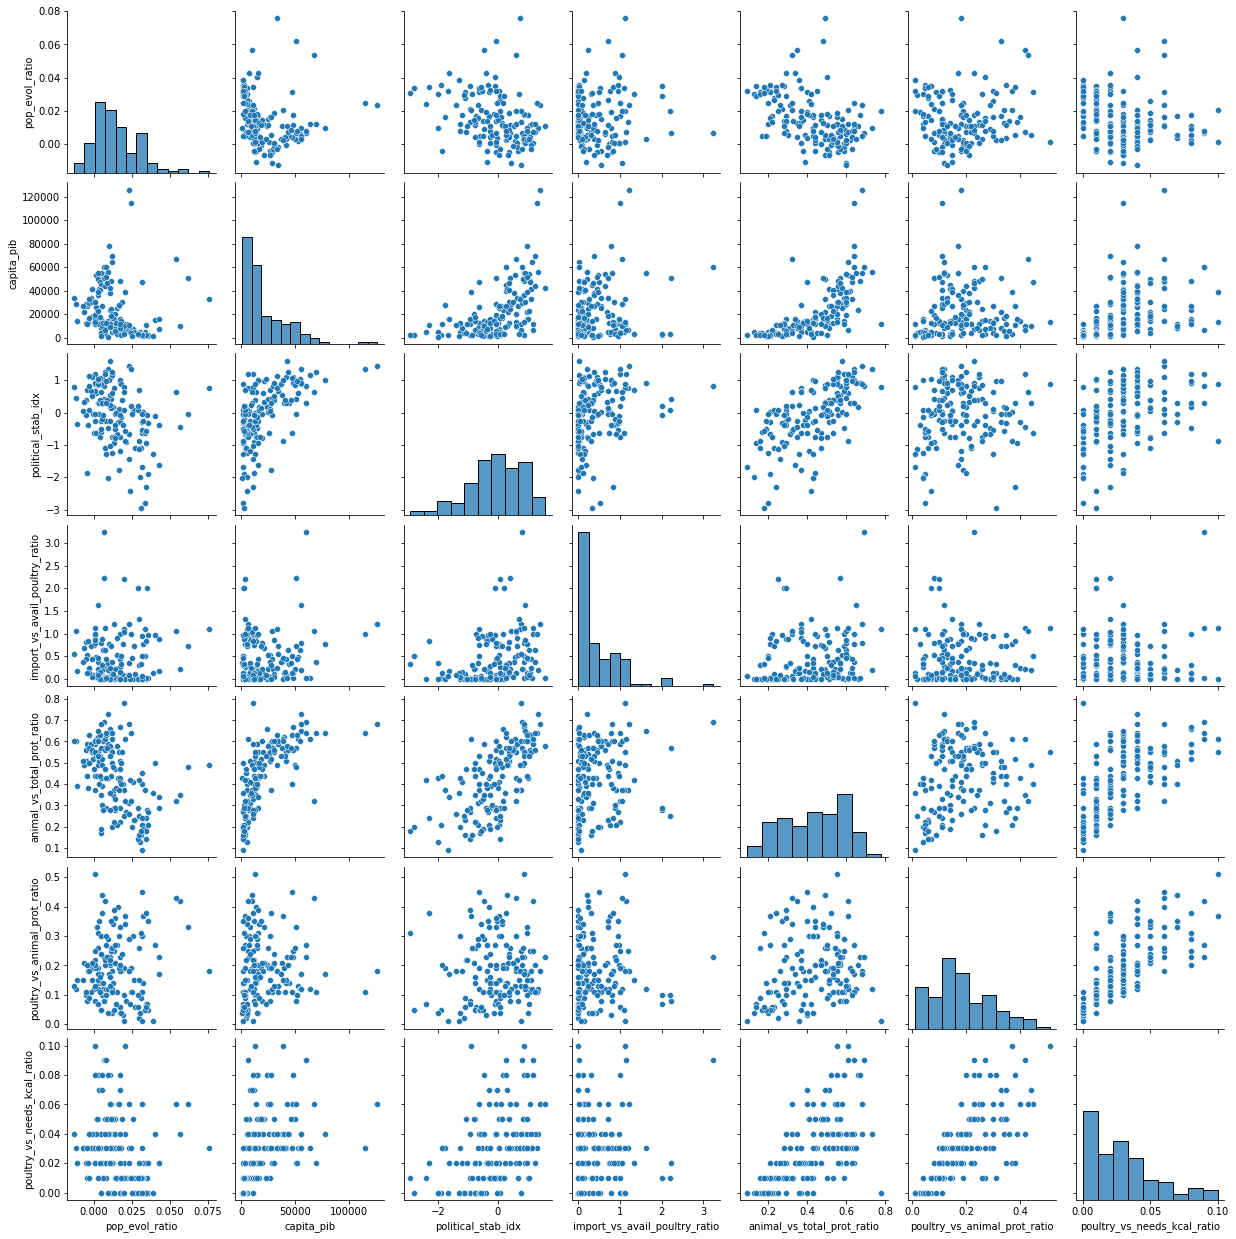

In [46]:
ax=sns.pairplot(main_df.iloc[:,1:8])

Je recherche les outliers de chaque variable numérique.

In [47]:
outliers=[]
columns_list=main_df.columns[1:8]

for i in range (len(columns_list)):
    median=np.median(main_df[columns_list[i]])

    q1=np.median(main_df[main_df[columns_list[i]]<=median][columns_list[i]])
    q3=np.median(main_df[main_df[columns_list[i]]>median][columns_list[i]])
    iqr=q3-q1
    outlier_q1=q1-(1.5*iqr)
    outlier_q3=q3+(1.5*iqr)
    
    outliers.append(main_df[(main_df[columns_list[i]]>outlier_q3)|(main_df[columns_list[i]]<outlier_q1)][columns_list[i]].index.values)

    print(colored((f"Les outliers de la variable {columns_list[i]} sont les données inférieures à {outlier_q1} et supérieures à {outlier_q3}"),'blue', attrs=['bold']))
    
    if (main_df[(main_df[columns_list[i]]>outlier_q3)|(main_df[columns_list[i]]<outlier_q1)]).size>1:
        print(f"{main_df[(main_df[columns_list[i]]>outlier_q3)|(main_df[columns_list[i]]<outlier_q1)][columns_list[i]]}")
    else:
        print(f"Il n'y a aps d'outliers pour la variable {columns_list[i]}")
    print("_________________________________________________________________________________________________________________________________________________")
    

Les outliers de la variable pop_evol_ratio sont les données inférieures à -0.024545350833717602 et supérieures à 0.052614570756473286
Zone
Jordanie               0.056441
Koweït                 0.061984
Oman                   0.075598
Émirats arabes unis    0.053792
Name: pop_evol_ratio, dtype: float64
_________________________________________________________________________________________________________________________________________________
Les outliers de la variable capita_pib sont les données inférieures à -32500.6 et supérieures à 67909.4
Zone
Chine - RAS de Macao    126144.0
Irlande                  77749.2
Luxembourg              114986.0
Suisse                   69103.6
Name: capita_pib, dtype: float64
_________________________________________________________________________________________________________________________________________________
Les outliers de la variable political_stab_idx sont les données inférieures à -2.5125 et supérieures à 2.5475000000000003
Zone
Afg

J'applatis le fichier outliers qui contient pluseiurs listes.

In [48]:
import itertools
flat_list = itertools.chain(*outliers)

outliers_list=(list(flat_list))# converting iterable to list

J'affiche tous les pays ayant au moins un outlier dans une colonne.

In [49]:
main_df.loc[main_df.index.isin(outliers_list)]

,continent,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio
Zone,,,,,,,,
Afghanistan,Asie,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00
Belgique,Europe,0.006751,50442.3,0.43,2.22,0.57,0.08,0.02
Chine - RAS de Hong-Kong,Asie,0.006817,59842.2,0.83,3.24,0.69,0.23,0.09
Chine - RAS de Macao,Asie,0.023404,126144.0,1.43,1.21,0.68,0.18,0.06
Gambie,Afrique,0.035006,2072.6,-0.08,2.00,0.28,0.07,0.01
Irlande,Europe,0.009912,77749.2,1.00,0.77,0.64,0.17,0.04
Israël,Asie,0.020398,39121.3,-0.89,0.00,0.61,0.37,0.10
Jordanie,Asie,0.056441,10003.6,-0.45,0.23,0.35,0.42,0.04
Koweït,Asie,0.061984,50855.6,-0.05,0.72,0.48,0.33,0.06


**Observation**<br>
Malgré la présence d'outliers, je ne souhaite pas supprimer les informations qui ne me semblent pas abérrantes ou anormales lorsqu'on les regarde. Cela fait même partie de l'analyse, les individus avec de fortes valeurs sur certaines variables peuvent être intéressants à envisager et donner du poids à la sélection de ce pays.<br>
Le problème pour le k-means est que les outliers peuvent fausser le découpage en cluster en attirant certaines données vers eux et donc en déplaçant des clusters.

## Classification ascendante hiérarchique

La finalité est de trouver le nombre de cluster idéal.

On met les données à la même échelle pour pouvoir interpréter la heat map avec l'attribut standard_scale, et on ne garde que les données numériques (exit continent)

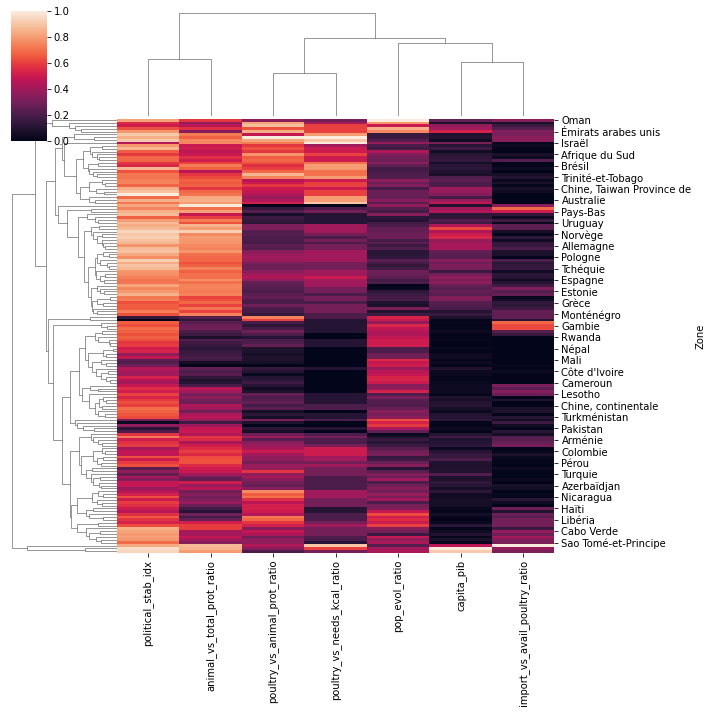

In [50]:
main_df_num=main_df.iloc[:,1:8].copy()
sns.clustermap(main_df_num, standard_scale=1)

**Observation**<br>
A ce stade, la heatmap n'est pas exploitable. On va plutôt réaliser un dendrogramme qui va nous permettre de déterminer le nombre de clusters.<br> 
On va "couper" l'arbre pour définir le nombre de classe là où les branches semblent les plus longues.

In [51]:
# Preparing data for clustering
X = main_df_num
names = main_df_num.index

In [52]:
X

,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio
Zone,,,,,,,
Afghanistan,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00
Afrique du Sud,0.016063,13860.3,-0.28,0.24,0.43,0.40,0.06
Albanie,-0.004938,12771.0,0.38,0.81,0.51,0.10,0.03
Algérie,0.021138,11737.4,-0.92,0.01,0.27,0.08,0.01
Allemagne,0.001699,53071.5,0.59,0.48,0.61,0.13,0.03
...,...,...,...,...,...,...,...
Émirats arabes unis,0.053792,67183.6,0.62,1.05,0.32,0.43,0.06
Équateur,0.017408,11617.9,-0.07,0.00,0.47,0.20,0.04
États-Unis d'Amérique,0.008142,59914.8,0.29,0.01,0.64,0.27,0.09


In [53]:
# Preparing data for clustering
#X = main_df_num.values
X = main_df_num
names = main_df_num.index

# Centering and Reduction
scaler = StandardScaler()
XCR = scaler.fit_transform(X)




Je vérifie que les données sont bien proche de 0 pour la moyenne, et égales à 1 pour l'écart-type (action du centrage réduction)

In [54]:
mean_and_standard_deviation(XCR)

Moyennes:
2.4625247538678283e-17

Ecart-type :
1.0



Le découpage de la classification hiérarchique se fait après la 1re visualisation du dendrogramme.<br>
En principe, on coupe vers le haut, là où les branches sont les plus longues. 

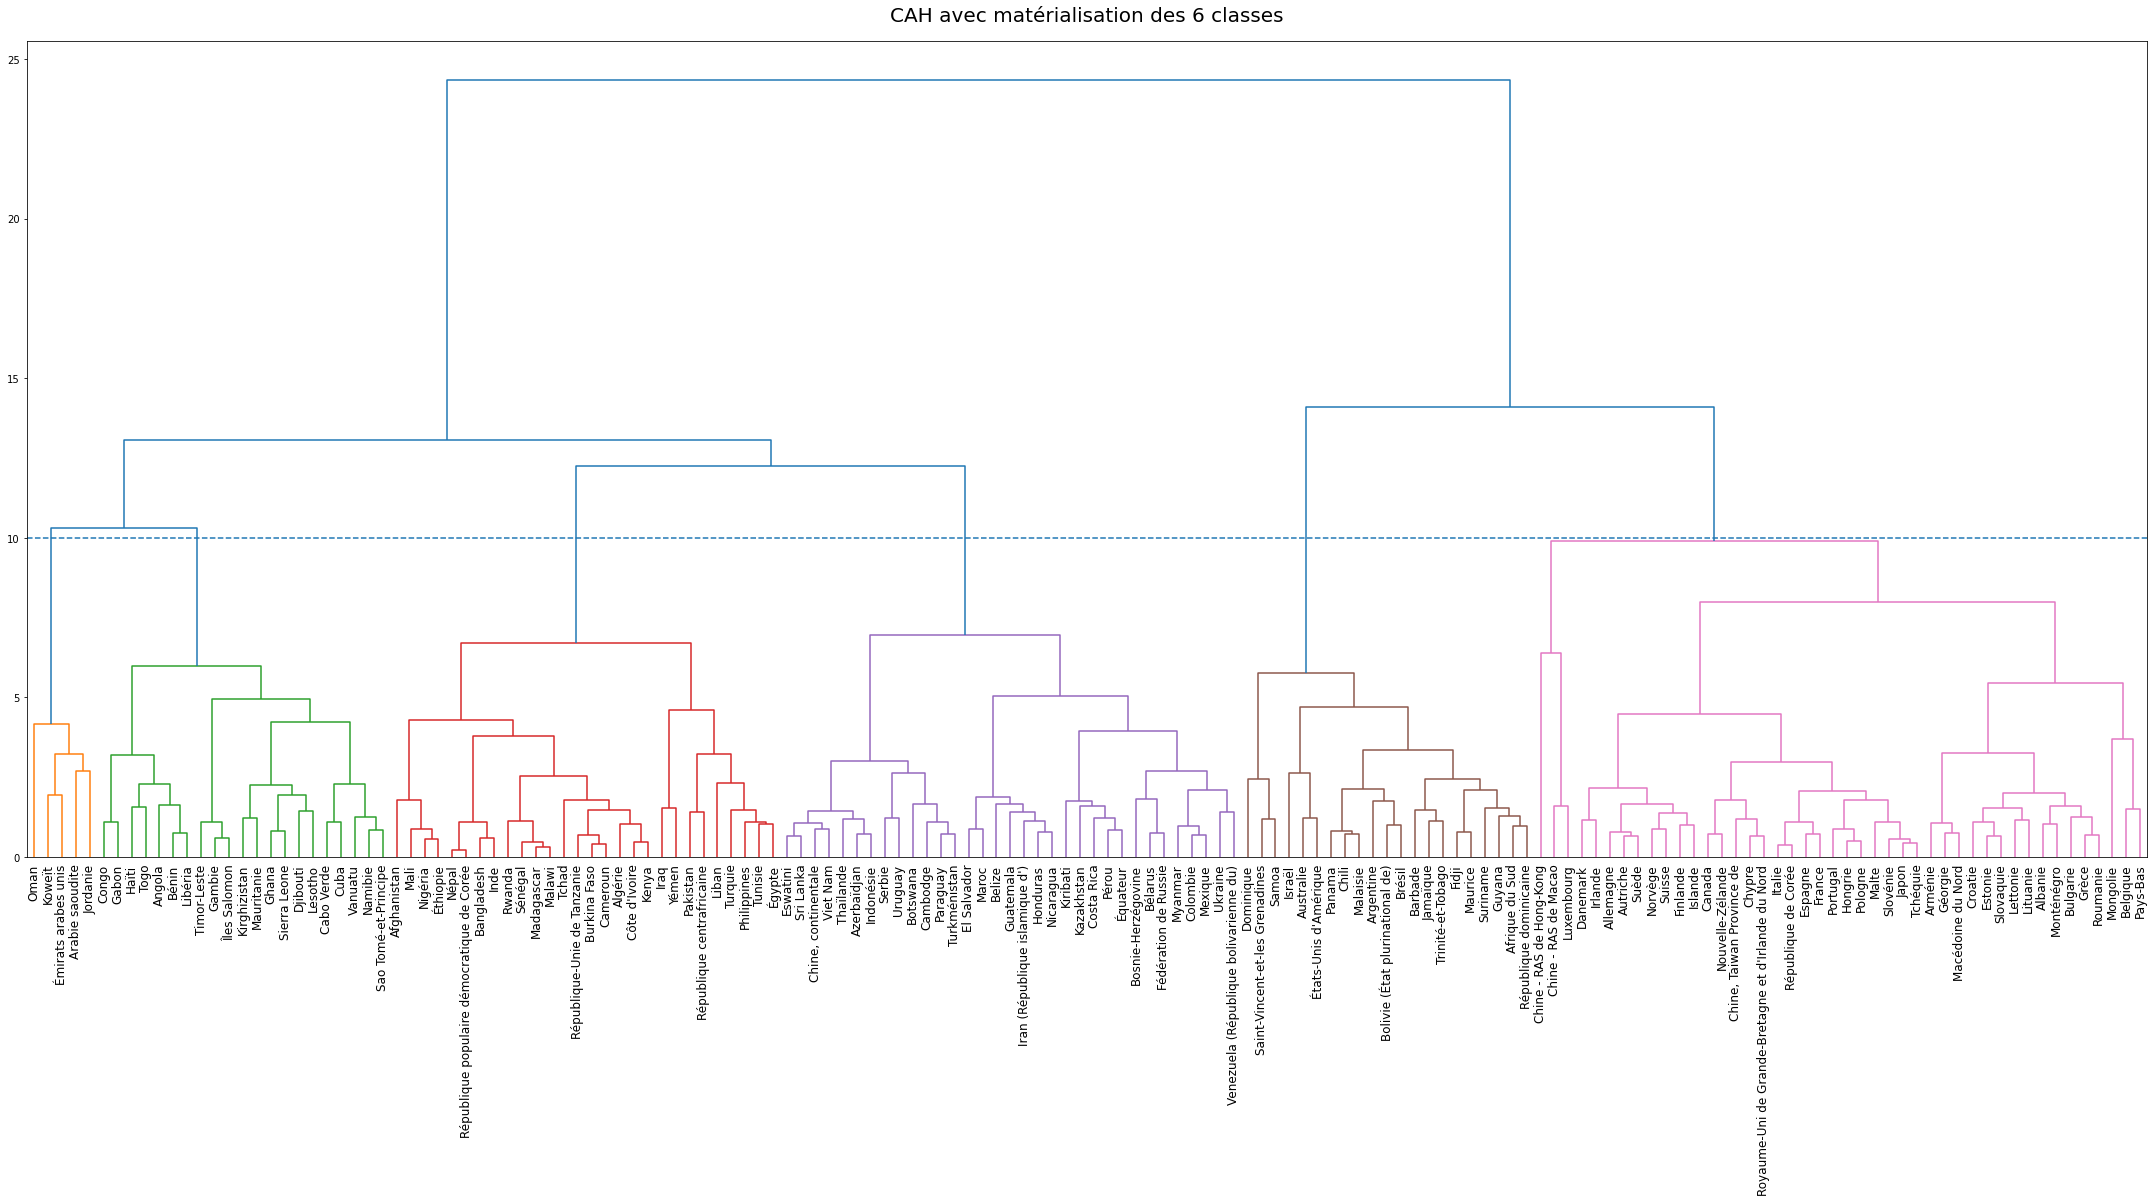

In [55]:
threshold = 10 # where I cut my tree to have the number of classification thah I've chosen after 1st observation, the max distance.

Z = linkage(XCR,method='ward',metric='euclidean')

# Show dendrogram
fig = plt.figure(figsize=(38, 15))
ax = fig.add_subplot(1, 1, 1)
plt.title('CAH avec matérialisation des 6 classes', loc='center', fontsize=20, fontweight=0, pad=20)

dendrogram(Z,labels= names ,orientation='top',color_threshold=threshold,leaf_font_size=12)

plt.axhline(y=threshold,linestyle = '--') # To materialize the cutting, we use the threshold which cuts the dendogram on the axis of the Ward method.
plt.show()

In [56]:
number_of_clusters=6 # clusters are colored on the dendogram below

CAH_groups = fcluster(Z, number_of_clusters, criterion='maxclust')

print(f"Affichage des {number_of_clusters} clusters")
print("")
for i in range(1,len(np.unique(CAH_groups))+1):
    print(f"Cluster {i} :")
    print(f", ".join(main_df.index[CAH_groups == i].sort_values()))
    print(" ")


Affichage des 6 clusters

Cluster 1 :
Arabie saoudite, Jordanie, Koweït, Oman, Émirats arabes unis
 
Cluster 2 :
Angola, Bénin, Cabo Verde, Congo, Cuba, Djibouti, Gabon, Gambie, Ghana, Haïti, Kirghizistan, Lesotho, Libéria, Mauritanie, Namibie, Sao Tomé-et-Principe, Sierra Leone, Timor-Leste, Togo, Vanuatu, Îles Salomon
 
Cluster 3 :
Afghanistan, Algérie, Bangladesh, Burkina Faso, Cameroun, Côte d'Ivoire, Inde, Iraq, Kenya, Liban, Madagascar, Malawi, Mali, Nigéria, Népal, Pakistan, Philippines, Rwanda, République centrafricaine, République populaire démocratique de Corée, République-Unie de Tanzanie, Sénégal, Tchad, Tunisie, Turquie, Yémen, Égypte, Éthiopie
 
Cluster 4 :
Azerbaïdjan, Belize, Bosnie-Herzégovine, Botswana, Bélarus, Cambodge, Chine, continentale, Colombie, Costa Rica, El Salvador, Eswatini, Fédération de Russie, Guatemala, Honduras, Indonésie, Iran (République islamique d'), Kazakhstan, Kiribati, Maroc, Mexique, Myanmar, Nicaragua, Paraguay, Pérou, Serbie, Sri Lanka, Thaï

In [57]:
# Characterization of clusters according to the continent
continent_distrib = pd.DataFrame({"Continent":main_df.continent,"Cluster": CAH_groups })

print("Affichage du tableau de contingence")
continent_distrib.pivot_table(index="Continent", columns="Cluster", aggfunc=len, fill_value=0)

Affichage du tableau de contingence


Cluster,1,2,3,4,5,6
Continent,,,,,,
Afrique,0,15,17,3,2,0
Amériques,0,2,0,13,14,1
Asie,5,2,11,11,2,9
Europe,0,0,0,5,0,33
Océanie,0,2,0,1,3,1


Affectation des clusters pour chaque individu

In [58]:
print("Affichage du cluster pour chaque individu")
CAH_groups = fcluster(Z, threshold, criterion='distance') # second method to do it. For 1st one, see "clusters" below when you know the number of clusters.
main_df['CAH'] = CAH_groups
main_df

Affichage du cluster pour chaque individu


,continent,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio,CAH
Zone,,,,,,,,,
Afghanistan,Asie,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00,3
Afrique du Sud,Afrique,0.016063,13860.3,-0.28,0.24,0.43,0.40,0.06,5
Albanie,Europe,-0.004938,12771.0,0.38,0.81,0.51,0.10,0.03,6
Algérie,Afrique,0.021138,11737.4,-0.92,0.01,0.27,0.08,0.01,3
Allemagne,Europe,0.001699,53071.5,0.59,0.48,0.61,0.13,0.03,6
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,Asie,0.053792,67183.6,0.62,1.05,0.32,0.43,0.06,1
Équateur,Amériques,0.017408,11617.9,-0.07,0.00,0.47,0.20,0.04,4
États-Unis d'Amérique,Amériques,0.008142,59914.8,0.29,0.01,0.64,0.27,0.09,5


On compare maintenant chaque groupe d'individus par rapports à nos variables

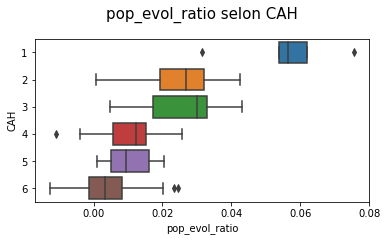

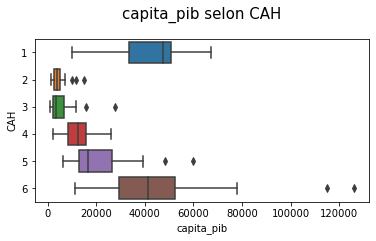

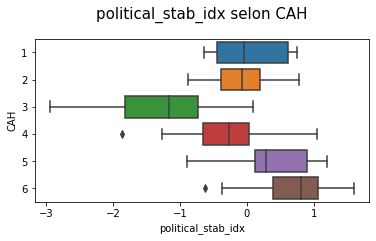

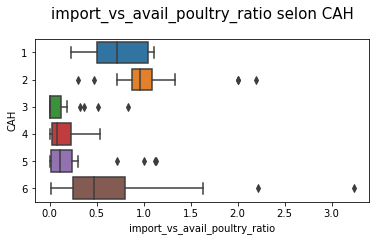

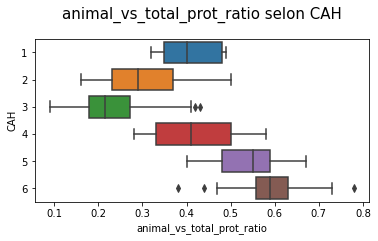

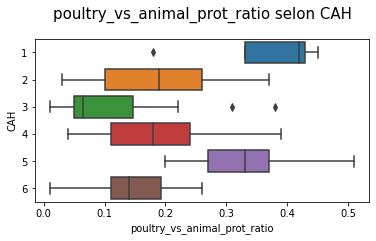

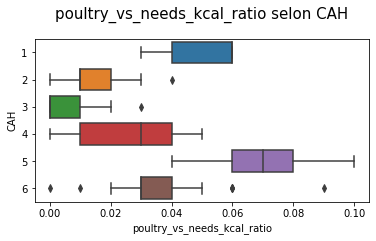

In [59]:
for item in main_df.columns[1:8]:
    build_plot(main_df,item, "CAH")

**Conclusion CAH :<br>**
- Le taux annuel de la **croissance démographique** de la population mondiale est de 1,2 % ([source](https://fr.wikipedia.org/wiki/Population_mondiale#cite_note-prb2016-1)). Le groupe 1 a le plus fort taux d'augmenation annuel de sa population en 10 ans. Les groupes 2 et 3 sont aussi intéressants.
- Le **PIB** moyen en dollars PAA (Parité du Pouvoir d'Achat) en 2017 est de ~16 000 dollars. Les groupes 1 et 6 se démarquent sur cet indicateur.
- Les groupes 3 et 4 sont à envisager avec précaution si on ne veut pas s'aventurer dans des pays dont le commerce des affaires, lié à la **stabilité politique**, n'est pas probant. Les groupes 5 et 6 n'ont aucune valeur négative.
- Le groupe 2 a le plus recours à l'**importation** pour la volaille. On relève aussi la présence du groupe 1, et dans une moindre mesure du 6.
- La **disponibilité de protéines animales** est la plus élevée chez les groupes 5 et 6, et la plus basse dans les groupes 2 et 3. Le groupe 3 contient l'Inde qui mange peu de viande et qui a une populaiton très élevée.<br>
    <u>Top 5 pays végétariens</u><br>
    - L’Inde : 39 % de végétariens en 2021 (groupe 4)<br>
    - Le Mexique : 20 % (2018) (groupe 5)<br>
    - Le Brésil : 14 % de végétariens et véganes (2018) (groupe 5)<br>
    - Taïwan et Israël : 13 %, végétariens et véganes confondus (2019 et 2015) (respectivement groupes 2 et 5)<br>
- Parmi les protéines animales disponibles, c'est dans les groupes 1, 5 que la part de **protéines de volailles** est la plus élevée.
- Enfin, les pays des groupes 1 et 5 ont la plus grande quantité d'énergie fournie par la volaille.

**Le groupe 1, composé de seulement 5 pays, semble être le meilleur choix. <br>
Il vaut mieux éviter le groupe contenant des pays consommant le moins de viande, on excluera donc les pays du groupe 3 (malgré les 2 outliers).<br>
Si on veut voir un peu plus grand, les groupes 5 et 6 seraient également une bonne option, mais avec un point d'attention sur le groupe 5 dont l'import semble limité (auto-suffisance en production volaille?)<br>
En regardant le tableau de contingence, le groupe 1 est exclusivement situé en Asie (et plus particulièrement au Moyen-Orient, plus précisément dans le golfe Persique).<br>
Les pays du groupe 5 sont majoritairement situés en Amériques, et ceux du groupe 6 en Europe.**

In [60]:
'''for item in main_df.columns[1:8]:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=main_df,x=item,y="CAH",orient="h")
    plt.xlabel(item,fontsize=10)
    plt.ylabel("CAH",fontsize=10)
    plt.title(item + " selon CAH" ,fontsize=15, pad=20)'''

'for item in main_df.columns[1:8]:\n    plt.figure(figsize=(6,3))\n    sns.boxplot(data=main_df,x=item,y="CAH",orient="h")\n    plt.xlabel(item,fontsize=10)\n    plt.ylabel("CAH",fontsize=10)\n    plt.title(item + " selon CAH" ,fontsize=15, pad=20)'

**Conclusion CAH :<br>**
- Le taux annuel de la **croissance démographique** de la population mondiale est de 1,2 % ([source](https://fr.wikipedia.org/wiki/Population_mondiale#cite_note-prb2016-1)). Le groupe 6 a le plus fort taux d'augmenation annuel de sa population en 10 ans. Le groupe 4 est aussi intéressant.
- Le **PIB** moyen en dollars PAA (Parité du Pouvoir d'Achat) en 2017 est de ~16 000 dollars. Les groupes 1 et 2 se démarquent sur cet indicateur.
- Les groupes 4 et 6 sont à envisager avec précaution si on ne veut pas s'aventurer dans des pays dont le commerce des affaires, lié à la **stabilité politique**, n'est pas probant. Les groupes 1 et 2 sont intéressants avec aucune valeur négative.
- Le groupe 1 a beaucoup recours à l'**importation** pour la volaille. On relève aussi la présence du groupe 6, et dans une moindre mesure du 3.
- La **disponibilité de protéines animales** est la plus élevée chez les groupes 1 et 2, et la plus basse dans les groupes 4 et 6. Le groupe 4 contient l'Inde qui mange peu de viande et qui a une populaiton très élevée.<br>
    <u>Top 5 pays végétariens</u><br>
    - L’Inde : 39 % de végétariens en 2021 (groupe 4)<br>
    - Le Mexique : 20 % (2018) (groupe 5)<br>
    - Le Brésil : 14 % de végétariens et véganes (2018) (groupe 5)<br>
    - Taïwan et Israël : 13 %, végétariens et véganes confondus (2019 et 2015) (respectivement groupes 2 et 5)<br>
- Parmi les protéines animales disponibles, c'est dans les groupes 5, 6 que la part de **protéines de volailles** est la plus élevée.
- Enfin, les pays des groupes 1, et 6 ont la plus grande quantité d'énergie fournie par la volaille.

==> Le groupe 1, composé de seulement 5 pays, semble être un bon choix. Si on veut voir un peu plus grand, les groupes 2 et 3 seraient également envisageable, mais avec un point d'attention sur le groupe 2 dont l'import semble limité.
En regardant le tableau de contingence, c'est dons la zone Europe qu'on devrait privilégier. => On pourrait effectuer le découpage du dendrogramme à 12 pour n'avoir que 4 classes dont 1 qui regrouperait quasiment tous les pays d'Europe.

## K-means : Paritionnement direct - Méthode alternative de clustering

La CAH n'est pas optimale car on prend en compte une hiérarchie entre les individus. On va tester une autre méthode de clustering pour comparer les résultat.

### Méthode du coude

Pour déterminer le nombre optimal de clusters par la méthode du coude, il faut sélectionner la valeur de k au «coude» du graphique généré, c’est-à-dire le point après lequel la distorsion / inertie commence à diminuer de façon + linéaire.<br>
On repart du data frame centré et réduit XCR.<br>

<u>Distorsion</u>: elle est calculée comme la moyenne des distances au carré des centres de cluster des clusters respectifs. En règle générale, la métrique de distance euclidienne est utilisée.<br>
<u>Inertie</u>: C’est la somme des distances au carré des échantillons par rapport à leur centre de cluster le plus proche.

J'itère les valeurs de k de 1 à 10 et calcule les valeurs de la distorsion et l’inertie pour chaque valeur de k dans la plage donnée.

In [61]:
# Je repars de mon df en ne gardant que les variables numériques et sans la colonne CAH
X_km = main_df.iloc[:,1:8]

mean_and_standard_deviation(X_km)

Moyennes:
pop_evol_ratio                       0.014779
capita_pib                       21361.163158
political_stab_idx                  -0.055000
import_vs_avail_poultry_ratio        0.438750
animal_vs_total_prot_ratio           0.432895
poultry_vs_animal_prot_ratio         0.184474
poultry_vs_needs_kcal_ratio          0.030461
dtype: float64

Ecart-type :
pop_evol_ratio                       0.014662
capita_pib                       21300.408746
political_stab_idx                   0.905802
import_vs_avail_poultry_ratio        0.527712
animal_vs_total_prot_ratio           0.155813
poultry_vs_animal_prot_ratio         0.109356
poultry_vs_needs_kcal_ratio          0.023847
dtype: float64



Je centre et réduis manuellement (pour essayer une autre technique) : je retranche la moyenne au dataframe et je divise par l'écart-type.<br>
J'affiche ensuite le résultat. Si la moyenne vaut 0 (ou presque) et l'écart-type 1, c'est ok.

In [62]:
X_CR_km=(X_km - X_km.mean())/X_km.std()

mean_and_standard_deviation(X_CR_km)

Moyennes:
pop_evol_ratio                  -4.324027e-16
capita_pib                       1.037182e-16
political_stab_idx              -2.556435e-18
import_vs_avail_poultry_ratio    3.213803e-17
animal_vs_total_prot_ratio       2.826686e-16
poultry_vs_animal_prot_ratio     5.200518e-16
poultry_vs_needs_kcal_ratio      2.310286e-15
dtype: float64

Ecart-type :
pop_evol_ratio                   1.0
capita_pib                       1.0
political_stab_idx               1.0
import_vs_avail_poultry_ratio    1.0
animal_vs_total_prot_ratio       1.0
poultry_vs_animal_prot_ratio     1.0
poultry_vs_needs_kcal_ratio      1.0
dtype: float64



In [63]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 

K = range(1,11) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(XCR)
      
    distortions.append(sum(np.min(cdist(X_CR_km, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_CR_km.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
print (f"""Valeurs de distortion :
{distortions}
""")

print (f"""Valeurs d'inertie :
{inertias}
""")

Valeurs de distortion :
[2.4701117156672705, 2.0207658982184777, 1.8163823563369474, 1.6957273665098176, 1.5908564910715324, 1.5486624562219726, 1.4755720131875503, 1.4172037409142562, 1.3632227742356884, 1.3263570208307502]

Valeurs d'inertie :
[1064.0, 734.6601754901228, 610.2927159338074, 532.9437264749123, 471.0559956837036, 427.457895572589, 390.1895591848896, 350.43180188018016, 323.7472676856547, 306.07713749219874]



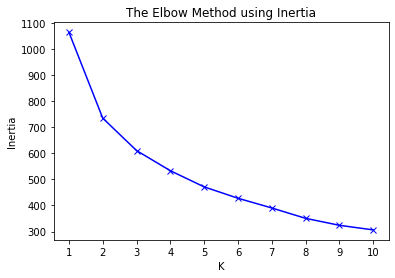

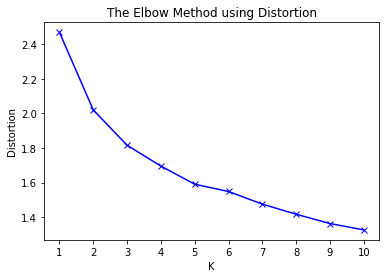

In [64]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Inertia') 
plt.xticks(np.arange(1,11, step=1))
plt.title('The Elbow Method using Inertia') 
plt.show() 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distortion') 
plt.xticks(np.arange(1,11, step=1))
plt.title('The Elbow Method using Distortion') 
plt.show() 


**Observation**<br>
Le graphique ne nous montre pas de "coude" évident, même si un k valant 2 ou 3 semble identifiable. <br>

On regarde pour 2 clusters

In [65]:
result = KMeans(n_clusters=2, random_state=0)
result.fit(X_CR_km)

KMeans(n_clusters=2, random_state=0)

On affiche les centres de classes. 

In [66]:
result.cluster_centers_

array([[ 0.47373473, -0.65447774, -0.68797506, -0.09157925, -0.86647138,
        -0.3010762 , -0.69262953],
       [-0.41524896,  0.57367802,  0.60303986,  0.08027317,  0.75949961,
         0.2639063 ,  0.60711971]])

On affiche les valeurs des cluster

In [67]:
result.labels_

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int32)

J'ajoute le clustering dans le dataframe copié.

In [68]:
X_km_2=X_km.copy()

In [69]:
X_km_2['kmeans_2_clusters']=result.labels_

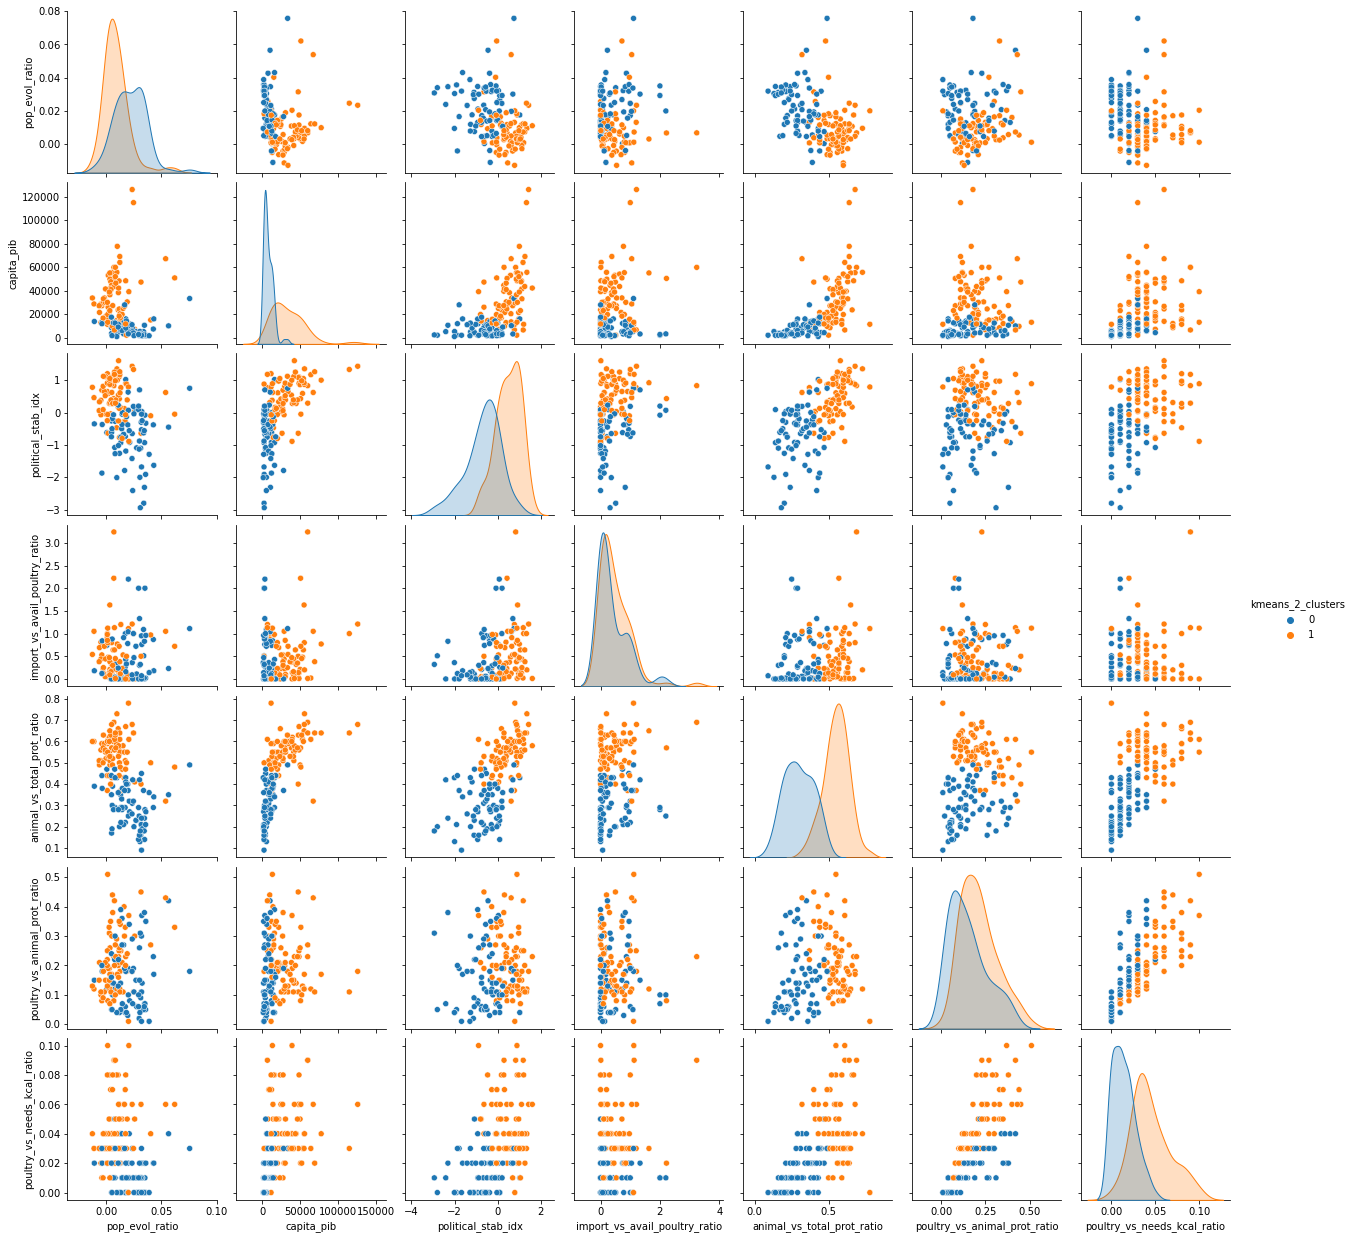

In [70]:
sns.pairplot(X_km_2, hue='kmeans_2_clusters')

**Observation**<br>
Les courbes de densités se chevauchent pour beaucoup, notamment sur import_vs_avail_ratio, poultry_vs_animal_prot_ratio et poultry_vs_needs_kcal_ratio, ce qui semble indiquer que 2 clusters n'est pas idéal. <br>
On va tester avec un visualiseur "automatique" de coude pour voir ce qui est préconisé comme découpage.

### Méthode de visualisation du coudeKElbowVisualizer

Méthode avec kelbow_visualizer

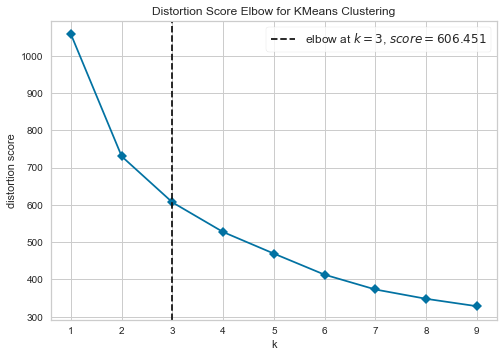

In [71]:
from yellowbrick.cluster.elbow import kelbow_visualizer

elbow = kelbow_visualizer(result,X=X_CR_km,k=(1,10), metric='distortion', timings=False)

Méthode avec KElbowVisualizer

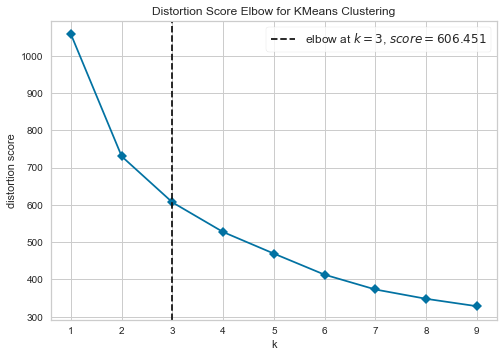

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(result,k=(1,10), metric='distortion', timings=False)
elbow.fit(X_CR_km) # Fit the data to the visualizer
elbow.show()

**Observation**<br>
3 clusters étant le nombre défini, on va faire le test sur 3 clusters.

In [73]:
result_3k = KMeans(n_clusters=3, random_state=42)
result_3k.fit(X_CR_km)

KMeans(n_clusters=3, random_state=42)

In [74]:
X_km_3=X_km.copy()
X_km_3['kmeans_3_clusters']=result_3k.labels_

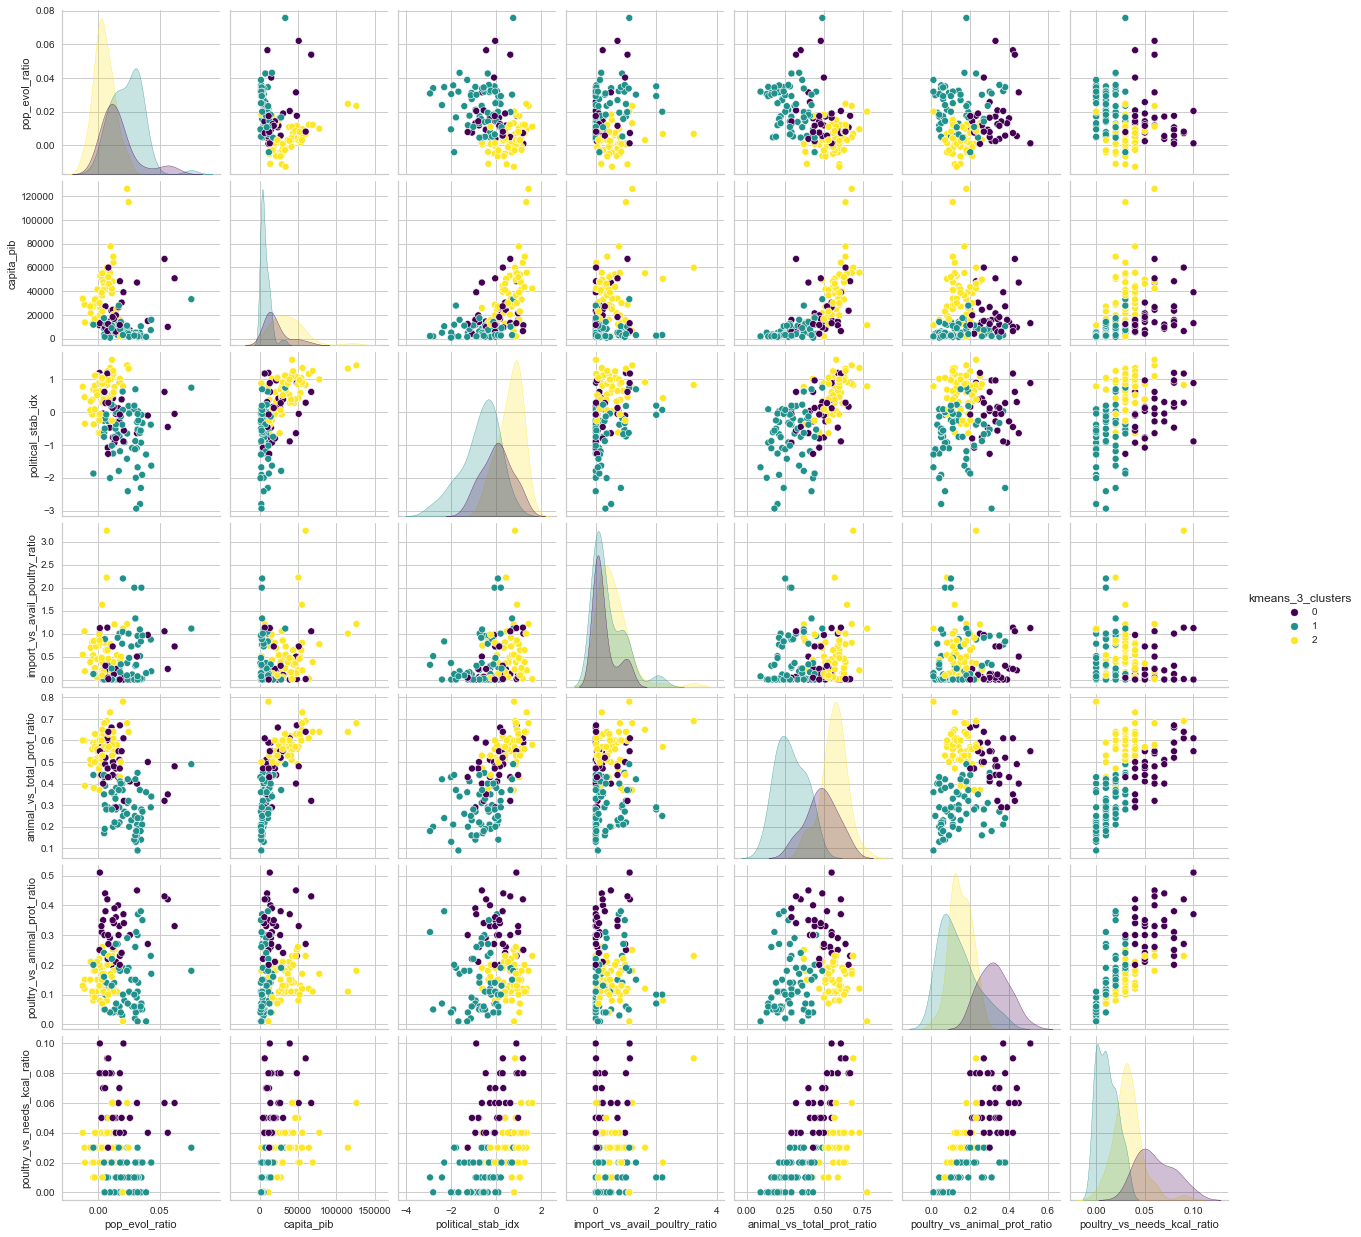

In [75]:
sns.pairplot(X_km_3, hue='kmeans_3_clusters', palette='viridis')

**Observation**<br>
Il y a aussi pas mal de chevauchement sur 3 clusters mais on ne peut pas proposer que 2 groupes, la réduction est trop petite.<br>
Je regarde si l'analyse des silhouettes donne le même résultat.

### Silhouette Analysis Méthode de la silhouette

Calcul des scores de silhouette pour le modèle de clustering K-means avec différentes valeurs pour le nombre de clusters.

Quand le nombre de clusters vaut 2, le score de silhouette score vaut 0.281.
Quand le nombre de clusters vaut 3, le score de silhouette score vaut 0.267.
Quand le nombre de clusters vaut 4, le score de silhouette score vaut 0.261.
Quand le nombre de clusters vaut 5, le score de silhouette score vaut 0.225.
Quand le nombre de clusters vaut 6, le score de silhouette score vaut 0.226.
Quand le nombre de clusters vaut 7, le score de silhouette score vaut 0.249.
Quand le nombre de clusters vaut 8, le score de silhouette score vaut 0.232.
Quand le nombre de clusters vaut 9, le score de silhouette score vaut 0.207.


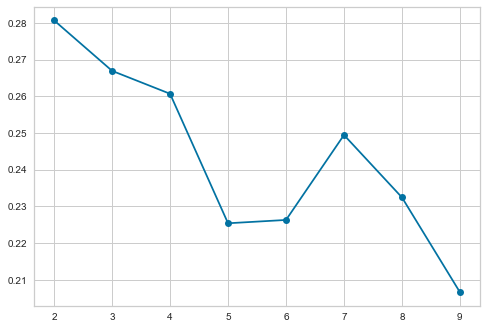

In [76]:
#Use silhouette score
#range_n_clusters = list (range(2,10))
silhouettes=[]
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42) # Instantiate the Kmeans model. 
    predictions = clusterer.fit_predict(X_CR_km) # Fit the KMeans model
    centers = clusterer.cluster_centers_
    score = silhouette_score(X_CR_km, predictions) #Calculate Silhoutte Score or score = silhouette_score(X_CR_km, clusterer.labels_, metric='euclidean')
    silhouettes.append(score)
    
    print(f"Quand le nombre de clusters vaut {n_clusters}, le score de silhouette score vaut {score:.3f}.")  

plt.plot(range(2,10),silhouettes, marker='o')    

Il faut privilégier 2 ou 3 clusters pour lesquels le score est le + élevé.

Analyse des silhouettes avec k de 2 à 8

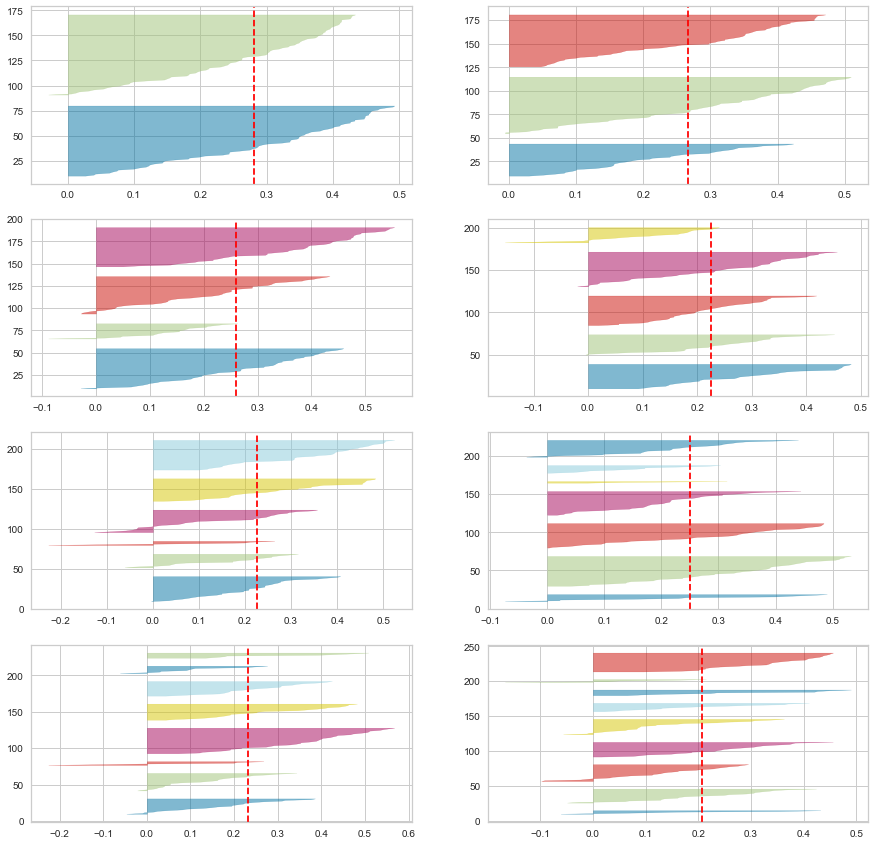

In [77]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,15))

for i in range (2,10):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_CR_km)




**Observation**<br>

Pour un nombre de clusters de 4 ou 5, il y a des scores de silhouette inférieurs à la moyenne.<br>
Il y a trop de fluctuation dans la taille des silhouettes pour un nombre de clusters 6 à 9.<br>
Pour une taille de 4 à 9 clusters, l'épaisseur de chaque cluster varie également trop.<br>

Une valeur de 2 ou 3 pour le nombre de clusters semble optimal. Le score de chaque silhouette est au dessus de la moyenne des scores et la fluctuation à peu près similaires, tout comme l'épaisseur de chaque cluster.<br>
**Les différentes méthodes s'accordent pour le nombre de clusters idéal : 2 ou 3**

/var/folders/1r/qq5r_c7j22jc90rnpcm6drcw0000gn/T/ipykernel_47890/2878029214.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet')


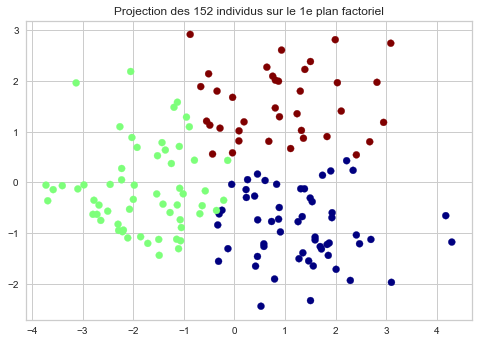

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 3
# import de l'échantillon

# préparation des données pour le clustering
X = main_df_num.values

# On réduit
X_scaled = scaler.fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=4).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet')
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

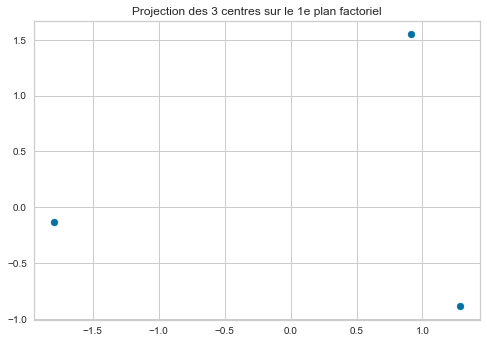

In [79]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [80]:
from sklearn import datasets
from sklearn.cluster import KMeans

#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=2, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X_CR_km)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X_CR_km, km.labels_, metric="euclidean")
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.281


In [81]:
main_df_num

,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio
Zone,,,,,,,
Afghanistan,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00
Afrique du Sud,0.016063,13860.3,-0.28,0.24,0.43,0.40,0.06
Albanie,-0.004938,12771.0,0.38,0.81,0.51,0.10,0.03
Algérie,0.021138,11737.4,-0.92,0.01,0.27,0.08,0.01
Allemagne,0.001699,53071.5,0.59,0.48,0.61,0.13,0.03
...,...,...,...,...,...,...,...
Émirats arabes unis,0.053792,67183.6,0.62,1.05,0.32,0.43,0.06
Équateur,0.017408,11617.9,-0.07,0.00,0.47,0.20,0.04
États-Unis d'Amérique,0.008142,59914.8,0.29,0.01,0.64,0.27,0.09


# ACP

In [82]:
main_df

,continent,pop_evol_ratio,capita_pib,political_stab_idx,import_vs_avail_poultry_ratio,animal_vs_total_prot_ratio,poultry_vs_animal_prot_ratio,poultry_vs_needs_kcal_ratio,CAH
Zone,,,,,,,,,
Afghanistan,Asie,0.033931,2058.4,-2.80,0.51,0.20,0.05,0.00,3
Afrique du Sud,Afrique,0.016063,13860.3,-0.28,0.24,0.43,0.40,0.06,5
Albanie,Europe,-0.004938,12771.0,0.38,0.81,0.51,0.10,0.03,6
Algérie,Afrique,0.021138,11737.4,-0.92,0.01,0.27,0.08,0.01,3
Allemagne,Europe,0.001699,53071.5,0.59,0.48,0.61,0.13,0.03,6
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,Asie,0.053792,67183.6,0.62,1.05,0.32,0.43,0.06,1
Équateur,Amériques,0.017408,11617.9,-0.07,0.00,0.47,0.20,0.04,4
États-Unis d'Amérique,Amériques,0.008142,59914.8,0.29,0.01,0.64,0.27,0.09,5


In [83]:
X = main_df.iloc[:,1:8]
#Normalisation
from sklearn import preprocessing 
X_norm= preprocessing.scale(X)
X_norm.shape

(152, 7)

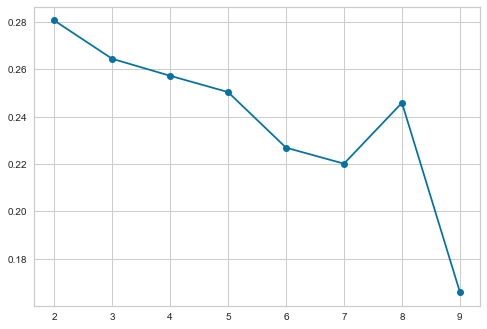

In [84]:
#%pylab inline
#from sklearn import cluster, metrics # metrics pour calculer coef de silhouette

silhouettes=[]
for num_clusters in range (2,10):
    cls = KMeans(n_clusters=num_clusters, init='random', n_init=1) # création d'un objet de clustering avec initialisation aléatoire et unique
    cls.fit(X_norm) # on fait le clustering sur les données normalisées
    silh = silhouette_score(X_norm, cls.labels_) # calcul coef silhouette sur les données étant donné clustering fourni par cls
    silhouettes.append(silh)
plt.plot(range(2,10),silhouettes, marker='o')



score = silhouette_score(X_CR_km, km.labels_, metric='euclidean')

D'après le résultat, il faut privilégier 3 clusters, car le coef est le + élevé (après 2 mais ils sont très proches)

Pour voir à quoi ressemble les clusters, je vais utiliser une analyse en composante pricipale pour projeter les données en 3D.

In [85]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 7)
pca.fit(X_norm)
print (pca.explained_variance_ratio_.cumsum()) # pourcentage de variance expliqué par les n premières composantes. Avec 3 composantes, on explique 79% de la variance, avec 4, 89.
X_trans = pca.transform(X_norm) # projection des données

[0.43132812 0.63589264 0.79460699 0.89292805 0.94938476 0.98460977
 1.        ]


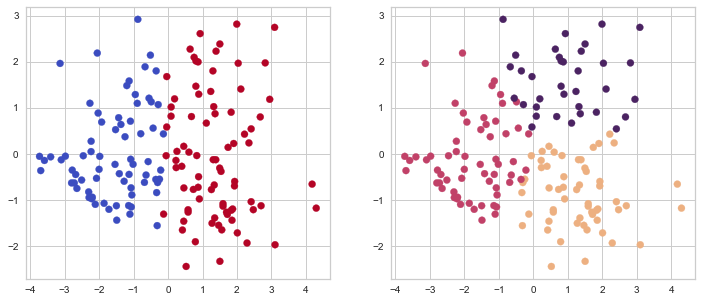

In [86]:
fig = plt.figure(figsize=(12,5))
cls2 = KMeans(n_clusters=2) 
cls2.fit(X_norm)
ax = fig.add_subplot(121) # Je créé une sous-figure pour mon cluster = 2 : 121 -> 1 figure en ordonnée, 2 figures en horizontal, on s'occupe de la 1re pour le moment
ax.scatter(X_trans[:,0], X_trans[:,1],cmap = "coolwarm",  c=cls2.labels_) #Données projetées selon 1re composante, puis selon 2me. Je colore en fonction des étiquettes données par le clustering

cls3 = KMeans(n_clusters=3) 
cls3.fit(X_norm)
ax = fig.add_subplot(122) # Je créé une sous-figure pour mon cluster = 2 : 122 -> 1 figure en ordonnée, 2 figures en horizontal, on s'occupe de la 2de pour le moment
ax.scatter(X_trans[:,0], X_trans[:,1], cmap = "flare", c=cls3.labels_) #Données projetées selon 1re composante, puis selon 2me. Je colore en fonction des étiquettes données par le clustering